## Assignment 2 Sample Solution

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong

**Question 1**
Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


## Monty Hall problem

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [1]:
import numpy as np

a = np.array([0, 1, 2])
N_games = 1000

# To see if it is to our advantage, we want to calculate 
# the probability of winning the car 
# if the contestant chooses to switch doors vs. if they do not

# This function is to simulate N games (say 1,000 or 10,000) to find odds winning the car
def games(N):
    N_wins_first_choice = 0
    N_wins_second_choice = 0
    
    for i in range(1, N+1):
        
        # Randomly the door with the car behind it
        prize = np.random.choice(a)
        
        # Randomly choose the door for the contestant, and remove it from 
        # the list of doors to open
        player = np.random.choice(a)
        if prize == player:
            
            # If contestant's first guess was correct, 
            # she would win if stays with the first choice
            N_wins_first_choice +=1
            # Monty picks randomly any other door, 
            # in this case other two doors without prize
            host = np.random.choice(np.delete(a, prize))
        else:
            
            
            # otherwise Monty will open the other  door (without price)
            host = np.delete(a, [prize, player])[0]
        # Contestant may choose to change door, and pick unopened door.
        second_choice = np.delete(a, [player, host])[0]
        
        # evaluate if the "other door" is the winner
        if prize == second_choice:
            N_wins_second_choice += 1
        
    return [N_wins_first_choice, N_wins_second_choice]


# Function above would give us winning odds, 
# or how many times contestant wins switching door in N_games.
# Each run of that function would return somewhat different result.
# To see the variance of results we may choose to run N_games multiple times.
def runs(N, N_games = 1000):
    #trials = np.empty([])
    trials = games((N_games))
    for i in range(N-1):
        trials = np.vstack([trials, games(N_games)])
    return trials

In [2]:
from pandas import DataFrame
import matplotlib.pyplot as plt

plt.figure()

# we shall call 'runs' to simulate 30 different runs with 10000 games each.
# 30 runs will produce stucked lists, that are upload to DataFrame 
DT = DataFrame(runs(30, 10000), columns=["First Choice", "Alternate Choice"])

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

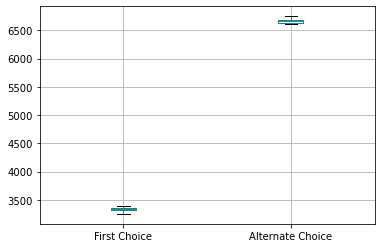

In [3]:
#.plot.hist(bins=100)
DT.boxplot()
# plt.show()

__NOTE:__ In this case, to obtain the intervals, 30 runs of 10,000 games were simulated.
It shows that the contestant wins on average 1/3 of the time staying with their original door choice
and with probability 2/3 when switching from their original door. 

If Monty picked the door to open randomly, that would not bring us any additional information and the chances to win would be the same with both strategies.   
But he specifically picks the door without a prize, this gives us additional information which can be used in counting odds. Later in this course we shall discuss Bayesian approach to this problem.